https://medium.com/hacktive-devs/recommender-system-made-easy-with-scikit-surprise-569cbb689824

#### Import libraries

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing the MovieLens data

In [40]:
data = pd.read_csv('ratings.csv')
data.head()

,userId,movieId,rating,timestamp
0,12882,1,4.0,1147195252
1,12882,32,3.5,1147195307
2,12882,47,5.0,1147195343
3,12882,50,5.0,1147185499
4,12882,110,4.5,1147195239


#### Checking the rating distributions

In [41]:
data.rating.value_counts()

4.0    66481
3.5    47305
3.0    44574
4.5    30529
5.0    25767
2.5    19017
2.0    15978
1.5     5716
1.0     5543
0.5     3595
Name: rating, dtype: int64

#### Visualizing the rating distributions

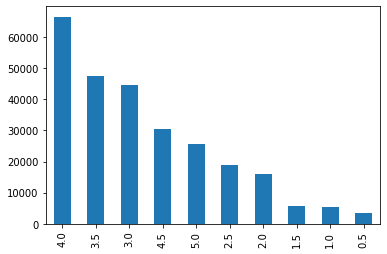

In [42]:
data.rating.value_counts().plot(kind='bar')
plt.show()

#### Checking null values

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264505 entries, 0 to 264504
Data columns (total 4 columns):
userId       264505 non-null int64
movieId      264505 non-null int64
rating       264505 non-null float64
timestamp    264505 non-null int64
dtypes: float64(1), int64(3)
memory usage: 8.1 MB


#### Removing timestamp column because we do not need it

In [44]:
data = data.iloc[:, :-1]
data.head()

,userId,movieId,rating
0,12882,1,4.0
1,12882,32,3.5
2,12882,47,5.0
3,12882,50,5.0
4,12882,110,4.5


#### Splitting data to train set and test set

In [45]:
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split

reader = Reader()
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

#### Testing the SVD algorithm on trainset and predict against test set

In [46]:
algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)

#### Obtaining the accuracy of the predictions using RMSE

In [47]:
accuracy.rmse(predictions)

RMSE: 0.7857


0.7857096369560852